3027020 - Noah Kuntner - Bemacs

# Starting off I import numpy, torch, torchvision and through torchvision I am able to access the data of the CIFAR10-dataset.

## Additionally, I use torch's linear functional and nn and matplotlib.pyplot for plotting purposes.

In [3]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt

# Import transforms' use is typical for Pytorch
transform = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root="C:/Users/noah_/Thesis/Pytorch", train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root="C:/Users/noah_/Thesis/Pytorch", train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")


# Plotting through Matplotlib the various predicted labels of random iterations.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


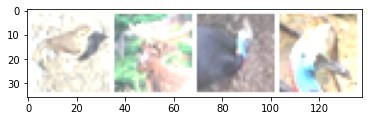

 bird  deer  bird  bird 


In [4]:
def imshow(img):
    img = img / 1.5 + 1
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# iterating over the data
dataiter = iter(trainloader)
images, labels = dataiter.next()

#create the grid
imshow(torchvision.utils.make_grid(images))
#print out the images with its respective labels based on the 
#previously assigned classes

print("".join("%5s " % classes[labels[j]] for j in range(4)))


# Building the convolutional neural network:

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        #creation of the Convolutional layer
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 84)
        self.fc4 = nn.Linear(84, 10)

    def forward(self, x):
        # forwarding part of the neural network; using self.pool()
        # the above parts of teh module are being called in conjuction with
        # rectifier linear unit and the linear functional
        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        
        # Rectifier linear unit
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

net = Net()


# Now one may train the model:

In [6]:
import torch.optim as optim

# Using CrossEntropy and defining optimizer through the imported torch.optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #obtaining all the inputs of the training data
        inputs, labels = data
        # using zero_grad() to set to null al parameter gradients
        optimizer.zero_grad()

        #output the loss backward to be able to analyze the logic
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print("[%d, %5d] loss: %.3f" %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print("Training done")




[1,  2000] loss: 2.302
[1,  4000] loss: 2.162
[1,  6000] loss: 1.832
[1,  8000] loss: 1.680
[1, 10000] loss: 1.592
[1, 12000] loss: 1.517
[2,  2000] loss: 1.465
[2,  4000] loss: 1.440
[2,  6000] loss: 1.394
[2,  8000] loss: 1.370
[2, 10000] loss: 1.349
[2, 12000] loss: 1.321
Training done


# Now one may test the model's performance

In [7]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print("Accuracy of the network on the 10000 test images: {}%".format((100 * correct / total)))


Accuracy of the network on the 10000 test images: 53.35%
